# CNN

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Membangun model sequential
model = Sequential()

# Convolutional layer pertama
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
# filters=8: terdapat 8 filter/kernel yang akan diterapkan pada input
# kernel_size=(5,5): ukuran kernel yang digunakan adalah 5x5
# padding='Same': menggunakan padding 'Same' sehingga ukuran output sama dengan ukuran input
# activation='relu': fungsi aktivasi ReLU digunakan setelah operasi konvolusi
# input_shape=(28,28,1): dimensi input adalah (28, 28, 1) untuk gambar grayscale 28x28 piksel

# Max Pooling layer pertama
model.add(MaxPool2D(pool_size=(2,2)))
# pool_size=(2,2): ukuran pooling window adalah 2x2

# Layer Dropout pertama
model.add(Dropout(0.25))
# Dropout(0.25): secara acak menonaktifkan 25% unit untuk mencegah overfitting

# Convolutional layer kedua
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
# filters=16: terdapat 16 filter/kernel yang akan diterapkan pada input
# kernel_size=(3,3): ukuran kernel yang digunakan adalah 3x3

# Max Pooling layer kedua
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# pool_size=(2,2): ukuran pooling window adalah 2x2
# strides=(2,2): langkah (strides) adalah 2x2

# Layer Dropout kedua
model.add(Dropout(0.25))
# Dropout(0.25): secara acak menonaktifkan 25% unit untuk mencegah overfitting

# Flatten layer
model.add(Flatten())
# Mengubah output menjadi vektor satu dimensi

# Dense layer pertama
model.add(Dense(256, activation='relu'))
# 256 unit dengan fungsi aktivasi ReLU

# Layer Dropout ketiga
model.add(Dropout(0.5))
# Dropout(0.5): secara acak menonaktifkan 50% unit untuk mencegah overfitting, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(

# Dense layer terakhir
model.add(Dense(10, activation='softmax')) #10 di sini adalah jumlah kelas target
# 10 unit dengan fungsi aktivasi softmax untuk klasifikasi multikelas

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set training parameters
epochs = 10
batch_size = 256 #semakin banyak batch size semakin cepat tapi modelnya belum tentu makin bagus

# Fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) #.fit berarti kita mulai menerapkan model ke dataset

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6553 - loss: 1.0650 - val_accuracy: 0.9599 - val_loss: 0.1352
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9323 - loss: 0.2234 - val_accuracy: 0.9727 - val_loss: 0.0831
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9512 - loss: 0.1605 - val_accuracy: 0.9791 - val_loss: 0.0623
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9602 - loss: 0.1288 - val_accuracy: 0.9829 - val_loss: 0.0512
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9660 - loss: 0.1106 - val_accuracy: 0.9849 - val_loss: 0.0450
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9669 - loss: 0.1026 - val_accuracy: 0.9858 - val_loss: 0.0404
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9701 - loss: 0.0960 - val_accuracy: 0.9871 - val_loss: 0.0378
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0855 - val_accuracy: 0

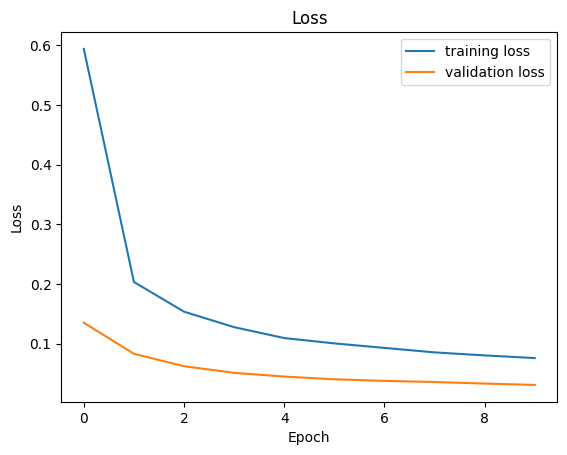

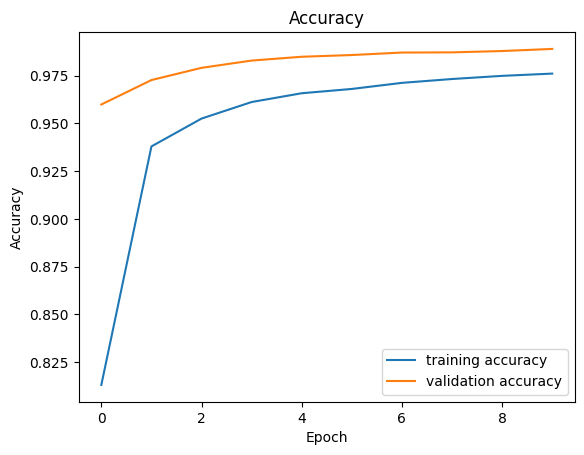

In [6]:
# prompt: make loss and accuracy plot

import matplotlib.pyplot as plt
# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


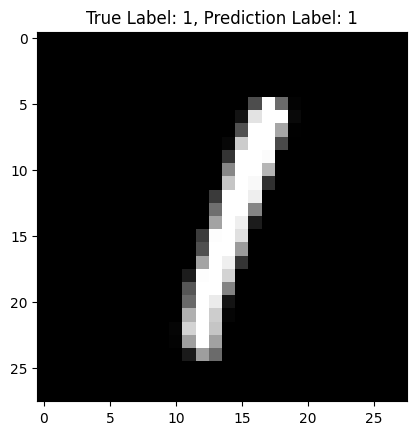

In [5]:
indeks = 5

test_image = x_test[indeks]
test_image = test_image.reshape(1, 28, 28)

true_label = np.argmax(y_test[indeks])

prediction = model.predict(test_image)
prediction_label = np.argmax(prediction)

plt.imshow(test_image.reshape(28,28), cmap = 'gray')
plt.title(f"True Label: {true_label}, Prediction Label: {prediction_label}")
plt.show()

# Cell

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 2
batch_size = 256

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

In [ ]:
indeks = 5

test_image = x_test[indeks]
test_image = test_image.reshape(1, 28, 28)

true_label = np.argmax(y_test[indeks])

prediction = model.predict(test_image)
prediction_label = np.argmax(prediction)

plt.imshow(test_image.reshape(28,28), cmap = 'gray')
plt.title(f"True Label: {true_label}, Prediction Label: {prediction_label}")
plt.show()